# Working with Time Series Data in Python

In this lesson, we will learn how to read, write and manipulate time series data using python's libraries such as pandas. We will also learn 
about shifting time series data in past and future as well as plotting them using matplotlib. So lets get started.

## What is Time Series Data?
Time Series is a sequence of data taken at specific (equal) intervals of time. Often such data is indexed on a datatimeindex object and if not, then
we need to do it as we will see later in this lesson.

### Example of Times Series data
Stock prices over a time period such as Apple Stock at below link
https://finance.yahoo.com/quote/AAPL?p=AAPL


In [153]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Exercise - 1
### Load test data and examine if it's a time series data or not. If not, convert it into a time series

In [154]:
import pandas as pd
stocks = pd.read_csv('data/apple.csv')
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Data columns (total 2 columns):
Date    9723 non-null object
AAPL    9722 non-null float64
dtypes: float64(1), object(1)
memory usage: 152.0+ KB


### Convert to time series
As seen above, stocks data has a column called 'Date' but it's type 
is set as object (aka string in python). So, as of now this dataset
isn't a time series dataset, and we need to convert it.

In [155]:
stocks = pd.read_csv('data/apple.csv', 
                     parse_dates=['Date'],
                     index_col='Date')
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9723 entries, 1980-12-12 to 2019-07-05
Data columns (total 1 columns):
AAPL    9722 non-null float64
dtypes: float64(1)
memory usage: 151.9 KB


### Print top 5 rows of a time series data
As seen above, 'Date' column is turned into a 'DatetimeIndex' object
using parse_dates attribute and is also used to index the dataset.
This step converts a regular dataset into a time series dataset.
Now we have a time series dataset at hand.


In [156]:
stocks.head(5)

,AAPL
Date,
1980-12-12,0.513393
1980-12-15,0.486607
1980-12-16,0.450893
1980-12-17,0.462054
1980-12-18,0.475446


### Another approach to convert to time series
There's another way to convert data into a time series without reloading it.

In [157]:
stocks = pd.read_csv('data/apple.csv')
stocks.Date = pd.to_datetime(stocks.Date)
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Data columns (total 2 columns):
Date    9723 non-null datetime64[ns]
AAPL    9722 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 152.0 KB


Now we can use 'Date' column as index

In [158]:
stocks.set_index('Date', inplace=True)
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9723 entries, 1980-12-12 to 2019-07-05
Data columns (total 1 columns):
AAPL    9722 non-null float64
dtypes: float64(1)
memory usage: 151.9 KB


# Exercise - 2
### Plot time series data

In [159]:
# Import requisite plotting modules
import matplotlib.pyplot as plt

# Display plots within jupyter notebook
%matplotlib inline

Text(0, 0.5, 'Price ($)')

Text(0.5, 0, 'Date')

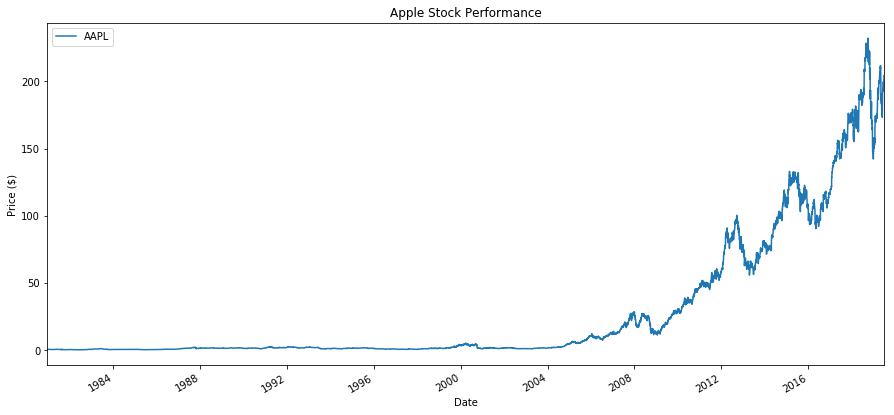

In [160]:
# set the title of the chart using 'title' attribute and figsize sets chart size in tuple of form (w,h) in inches
stocks.plot(title='Apple Stock Performance', figsize=(15,7)) 
plt.ylabel('Price ($)') # sets y label on chart
plt.xlabel('Date') # sets x label on chart
plt.show() # renders the chart on screen

# Exercise - 3
### Crafting your own time series data.

### Often you will face situation where time information is missing from data. In that case, you can add custom date column to the dataset and convert it into a time series.

In [161]:
import numpy as np # we need it for random function

# randomly generate a data array with 50 rows and 2 columns
data = np.random.random((50,2))

data

array([[0.60948493, 0.71544903],
       [0.80437084, 0.52426973],
       [0.35451459, 0.51651705],
       [0.24961752, 0.91388799],
       [0.12268264, 0.21998835],
       [0.49479338, 0.3415562 ],
       [0.56217315, 0.83527308],
       [0.62663525, 0.7291932 ],
       [0.22410315, 0.17648612],
       [0.82902335, 0.62928623],
       [0.38949568, 0.28154476],
       [0.48582602, 0.9269382 ],
       [0.85723724, 0.15273553],
       [0.09848531, 0.99587482],
       [0.73954003, 0.23380976],
       [0.82212696, 0.60559132],
       [0.99380553, 0.24441383],
       [0.82398491, 0.31584143],
       [0.0324662 , 0.7282953 ],
       [0.73842816, 0.30886593],
       [0.51366407, 0.02299394],
       [0.66318007, 0.43590692],
       [0.25983099, 0.54559838],
       [0.72223744, 0.82482316],
       [0.11235463, 0.16097213],
       [0.01895775, 0.37003826],
       [0.77018127, 0.36311655],
       [0.71770845, 0.1614938 ],
       [0.05832568, 0.57741134],
       [0.97393394, 0.61026689],
       [0.

In [162]:
# create an index column with DatetimeIndex object as follows:
# note period is set to 50 as we have 50 rows in our data array.
# freq = 'B' indicates we only need business days in date series.

dt = pd.date_range(start='2019-01-01', periods=50, freq='B')
dt

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-21', '2019-01-22',
               '2019-01-23', '2019-01-24', '2019-01-25', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-04', '2019-02-05', '2019-02-06', '2019-02-07',
               '2019-02-08', '2019-02-11', '2019-02-12', '2019-02-13',
               '2019-02-14', '2019-02-15', '2019-02-18', '2019-02-19',
               '2019-02-20', '2019-02-21', '2019-02-22', '2019-02-25',
               '2019-02-26', '2019-02-27', '2019-02-28', '2019-03-01',
               '2019-03-04', '2019-03-05', '2019-03-06', '2019-03-07',
               '2019-03-08', '2019-03-11'],
              dtype='datetime64[ns]', freq='B')

In [163]:
# Now we have data + index both, we can combine them together to form a pandas dataframe

df = pd.DataFrame(data=data, index=dt)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50 entries, 2019-01-01 to 2019-03-11
Freq: B
Data columns (total 2 columns):
0    50 non-null float64
1    50 non-null float64
dtypes: float64(2)
memory usage: 1.2 KB


In [164]:
df.head()

,0,1
2019-01-01,0.609485,0.715449
2019-01-02,0.804371,0.524270
2019-01-03,0.354515,0.516517
2019-01-04,0.249618,0.913888
2019-01-07,0.122683,0.219988


# Exercise - 4
### Accessing components of a DatetimeIndex object

### After setting a DatetimeIndex to a dataframe, it becomes relatively very easy to filter dataframe on components of time such as year, month, etc



In [165]:
# Problem 1. Count number of years for which we have stocks data
len((stocks.index.year).unique()) # as seen we can directly query a datetimeindex object on it's year.

40

In [166]:
# Problem 2. Get distinct days of weeks when data was captured
stocks.index.day_name().unique()

Index(['Friday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday'], dtype='object', name='Date')

In [167]:
# Problem 3. Get all records for 5th week in year 2017
week_5 = stocks['2017'].index.weekofyear == 5
stocks['2017'][week_5]

,AAPL
Date,
2017-01-30,121.629997
2017-01-31,121.349998
2017-02-01,128.750000
2017-02-02,128.529999
2017-02-03,129.080002


In [168]:
# Problem 4. Pull records within March 2017 and May 2017 (a given range)
# Note here we have not provided the day but only the YYYY-MM and pandas is able to filter the records since our index is a DatetimeIndex object.

#stocks['2017-3':'2017-5'] # even this works
stocks['2017-03':'2017-05']

,AAPL
Date,
2017-03-01,139.789993
2017-03-02,138.960007
2017-03-03,139.779999
2017-03-06,139.339996
2017-03-07,139.520004
2017-03-08,139.000000
2017-03-09,138.679993
2017-03-10,139.139999
2017-03-13,139.199997


In [169]:
# Easy to manipulate date components at various levels
"=== Year ==="
stocks.index.year 

"=== Year + 1 === "
stocks.index.year + 1

"=== Month === "
stocks.index.month

"=== Month -1 === "
stocks.index.month - 1

'=== Year ==='

Int64Index([1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980,
            ...
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='Date', length=9723)

'=== Year + 1 === '

Int64Index([1981, 1981, 1981, 1981, 1981, 1981, 1981, 1981, 1981, 1981,
            ...
            2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
           dtype='int64', name='Date', length=9723)

'=== Month === '

Int64Index([12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
            ...
             6,  6,  6,  6,  6,  6,  7,  7,  7,  7],
           dtype='int64', name='Date', length=9723)

'=== Month -1 === '

Int64Index([11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
            ...
             5,  5,  5,  5,  5,  5,  6,  6,  6,  6],
           dtype='int64', name='Date', length=9723)

# Exercise - 5
### Manipulating frequency of DatetimeIndex

### Support frequencies
'A' - Yearly
'Q' - Quarterly
'M' - Monthly
'W' - Weekly
'D' - Daily
'H' - Hourly
'B' - Business Days

In [170]:
# Problem 1 - Convert daily frequency of stock data to Monthly frequency
print("======= Daily Frequency =======")
print(stocks.asfreq('D').info())

print("======= Monthly Frequency =======")
print(stocks.asfreq('M').info())

======= Daily Frequency =======
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14085 entries, 1980-12-12 to 2019-07-05
Freq: D
Data columns (total 1 columns):
AAPL    9722 non-null float64
dtypes: float64(1)
memory usage: 220.1 KB
None
======= Monthly Frequency =======
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 463 entries, 1980-12-31 to 2019-06-30
Freq: M
Data columns (total 1 columns):
AAPL    325 non-null float64
dtypes: float64(1)
memory usage: 7.2 KB
None


### Notice how monthly frequency data is reduced to 325 records instead of 9723 original records. Also, memory usage is reduced by more than 98%.

In [171]:
dfm = stocks.asfreq('M')
dfm.tail(10)

,AAPL
Date,
2018-09-30,NaN
2018-10-31,218.860001
2018-11-30,178.580002
2018-12-31,157.740005
2019-01-31,166.440002
2019-02-28,173.149994
2019-03-31,NaN
2019-04-30,200.669998
2019-05-31,175.070007


In [172]:
# Problem 2 - Convert to yearly frequency and pad the missing values
dfy = stocks.asfreq('A')
print('Without ffill')
dfy.head(5)
dfy = stocks.asfreq('A',method='ffill') # ffill takes previous non null value and use for current NaN
print('With ffill')
dfy.head()

Without ffill


,AAPL
Date,
1980-12-31,0.609375
1981-12-31,0.395089
1982-12-31,0.533482
1983-12-31,NaN
1984-12-31,0.520089


With ffill


,AAPL
Date,
1980-12-31,0.609375
1981-12-31,0.395089
1982-12-31,0.533482
1983-12-31,0.435268
1984-12-31,0.520089


In [173]:
# 1983-12-31 data is coming from previous non null day
stocks.loc['1983-12-30']

AAPL    0.435268
Name: 1983-12-30 00:00:00, dtype: float64

## Upscaling
Upscaling means creating more data points than the original dataset. Imagine you have monthly data and would like to make it weekly or daily. In this case, you will need to create extra data points (upscaling).



In [174]:
# Problem 1 - Upscale a data using ffill and interpolation methods

# Let us create a dummy dataframe
index = pd.date_range(start='2018-01-01', periods=4, freq='W')
data = pd.DataFrame([1,2,3,4], columns=['value'])
data.set_index(index, inplace=True)
data


# as seen our data frequency is set to weekly, which we need to change to daily using 2 methods - ffill and interpolate

,value
2018-01-07,1
2018-01-14,2
2018-01-21,3
2018-01-28,4


### Upscaling data using ffill or bfill method.
### 'ffill' stands for 'forward fill' and will propagate last valid observation forward.
### 'bfill' stands for 'backward fill' and will propagate next valid observation backward.

In [175]:
# Using ffill method
data_f = data.resample('D').ffill().add_suffix('_ffill')
data_f.head(20)

,value_ffill
2018-01-07,1
2018-01-08,1
2018-01-09,1
2018-01-10,1
2018-01-11,1
2018-01-12,1
2018-01-13,1
2018-01-14,2
2018-01-15,2
2018-01-16,2


### As seen above, last non-null value is propagated forward.

# Using Interpolate method
Interpolation provides various methods of its own to compute the missing values. For this exercise we will use linear interpolation.

In [176]:
data_in = data.resample('D').interpolate().add_suffix('_interpolate')
data_in.head(20)

,value_interpolate
2018-01-07,1.000000
2018-01-08,1.142857
2018-01-09,1.285714
2018-01-10,1.428571
2018-01-11,1.571429
2018-01-12,1.714286
2018-01-13,1.857143
2018-01-14,2.000000
2018-01-15,2.142857
2018-01-16,2.285714


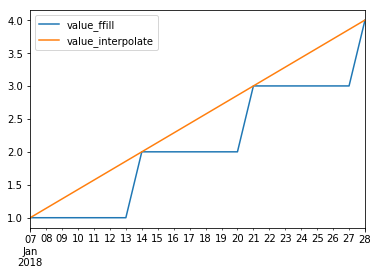

In [177]:
# Let us plot these 2 and examine them visually

pd.concat([data_f, data_in], axis=1).plot()
plt.show();

## Downsampling
The process of reducing the number of data points from raw dataset.
This is achieved by aggregation technique.

In [178]:
# Let us create a dummy dataframe with daily frequency
index = pd.date_range(start='2018-01-01', periods=365, freq='D')
data = pd.DataFrame(np.random.random(365), columns=['value'])
data.set_index(index, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2018-01-01 to 2018-12-31
Freq: D
Data columns (total 1 columns):
value    365 non-null float64
dtypes: float64(1)
memory usage: 5.7 KB


In [179]:
# Now suppose we want to find monthly average for 'value' column (downsampling).
# This can easily be achieved using resample method as follows:

data.resample('M').mean()

,value
2018-01-31,0.460404
2018-02-28,0.446385
2018-03-31,0.413941
2018-04-30,0.492727
2018-05-31,0.529450
2018-06-30,0.540886
2018-07-31,0.547796
2018-08-31,0.421841
2018-09-30,0.506931
2018-10-31,0.533801


In [180]:
### frequency 'M' indicates last day of the month. If we want Month start, we can use 'MS' as follows
## The result will remain same though.
data.resample('MS').mean()

,value
2018-01-01,0.460404
2018-02-01,0.446385
2018-03-01,0.413941
2018-04-01,0.492727
2018-05-01,0.529450
2018-06-01,0.540886
2018-07-01,0.547796
2018-08-01,0.421841
2018-09-01,0.506931
2018-10-01,0.533801


In [181]:
## We can also apply multiple aggregations in same flow
data.resample('MS').agg(['mean', 'median'])

value          
                mean    median
2018-01-01  0.460404  0.456510
2018-02-01  0.446385  0.384644
2018-03-01  0.413941  0.401265
2018-04-01  0.492727  0.480749
2018-05-01  0.529450  0.547326
2018-06-01  0.540886  0.567167
2018-07-01  0.547796  0.556787
2018-08-01  0.421841  0.431076
2018-09-01  0.506931  0.474453
2018-10-01  0.533801  0.579239
2018-11-01  0.583202  0.635365
2018-12-01  0.440094  0.363357

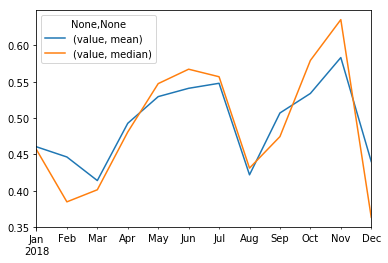

In [182]:
## finally we can plot these aggregations to visualize the results
data.resample('MS').agg(['mean', 'median']).plot()
plt.show();

# Exercise - 6
### Shifting time frames inside a pandas dataframe

### We will learn how to shift all values in a column in forward/backward direction

In [183]:
# Problem 1 - Create a new column with all values of APPL stock shifted by 2 days in future.
stocks['forward_2days'] = stocks.AAPL.shift(periods=2) # stocks frequency is 'D' - daily.
stocks.head(10)

,AAPL,forward_2days
Date,,
1980-12-12,0.513393,NaN
1980-12-15,0.486607,NaN
1980-12-16,0.450893,0.513393
1980-12-17,0.462054,0.486607
1980-12-18,0.475446,0.450893
1980-12-19,0.504464,0.462054
1980-12-22,0.529018,0.475446
1980-12-23,0.551339,0.504464
1980-12-24,0.580357,0.529018


In [184]:
# Problem 2 - Create a new column with APPL values shifted by 3 days backward

stocks['backward_3days'] = stocks.AAPL.shift(periods= -3)
stocks.tail(5)

,AAPL,forward_2days,backward_3days
Date,,,
2019-06-28,197.919998,199.800003,204.410004
2019-07-01,201.550003,199.740005,204.229996
2019-07-02,202.729996,197.919998,NaN
2019-07-03,204.410004,201.550003,NaN
2019-07-05,204.229996,202.729996,NaN


In [185]:
# Problem 3 - Create a new column with APPL values shifted by 1 week forward
# here the data is on daily frequency so if we set frequency to 'W', "M", 'A', it will give ValueError
# due to duplicate weeks, months, and year in the index column.
# So, to avoid this issue, we can set periods = 5 and freq to Business days for 1 week shift.
stocks['forward_1week'] = stocks.AAPL.shift(periods=5, freq='B')
stocks.head(10)

,AAPL,forward_2days,backward_3days,forward_1week
Date,,,,
1980-12-12,0.513393,NaN,0.462054,NaN
1980-12-15,0.486607,NaN,0.475446,NaN
1980-12-16,0.450893,0.513393,0.504464,NaN
1980-12-17,0.462054,0.486607,0.529018,NaN
1980-12-18,0.475446,0.450893,0.551339,NaN
1980-12-19,0.504464,0.462054,0.580357,0.513393
1980-12-22,0.529018,0.475446,0.633929,0.486607
1980-12-23,0.551339,0.504464,0.642857,0.450893
1980-12-24,0.580357,0.529018,0.627232,0.462054


# Exercise - 7
### Find percent change between consecutive weeks using period shifts.

In [186]:
# Problem 1 - How much is the percentage return on APPLE's stock in consecutive weeks?

stocks['return'] = stocks['AAPL'].\
                    sub(stocks['forward_1week']).\
                    div(stocks['forward_1week']).\
                    mul(100)
stocks.head(10)

,AAPL,forward_2days,backward_3days,forward_1week,return
Date,,,,,
1980-12-12,0.513393,NaN,0.462054,NaN,NaN
1980-12-15,0.486607,NaN,0.475446,NaN,NaN
1980-12-16,0.450893,0.513393,0.504464,NaN,NaN
1980-12-17,0.462054,0.486607,0.529018,NaN,NaN
1980-12-18,0.475446,0.450893,0.551339,NaN,NaN
1980-12-19,0.504464,0.462054,0.580357,0.513393,-1.739213
1980-12-22,0.529018,0.475446,0.633929,0.486607,8.715658
1980-12-23,0.551339,0.504464,0.642857,0.450893,22.277126
1980-12-24,0.580357,0.529018,0.627232,0.462054,25.603717


In [187]:
# Problem 2 - Simpler approach to solve above problem

stocks['return_1'] = stocks.AAPL.pct_change(periods=5).mul(100)
stocks[['AAPL', 'return_1']].head(10)

,AAPL,return_1
Date,,
1980-12-12,0.513393,NaN
1980-12-15,0.486607,NaN
1980-12-16,0.450893,NaN
1980-12-17,0.462054,NaN
1980-12-18,0.475446,NaN
1980-12-19,0.504464,-1.739213
1980-12-22,0.529018,8.715658
1980-12-23,0.551339,22.277126
1980-12-24,0.580357,25.603717


# Exercise - 8
### Combining Multiple Datasets on same time series index

In [188]:
# Load few datasets first
bac = pd.read_csv('data/BAC.csv', parse_dates=['Date'], index_col='Date')
bac.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11728 entries, 1973-02-21 to 2019-08-19
Data columns (total 1 columns):
BAC    11728 non-null float64
dtypes: float64(1)
memory usage: 183.2 KB


In [189]:
bk = pd.read_csv('data/BK.csv', parse_dates=['Date'], index_col='Date')
bk.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11678 entries, 1973-05-03 to 2019-08-19
Data columns (total 1 columns):
BK    11678 non-null float64
dtypes: float64(1)
memory usage: 182.5 KB


In [190]:
jpm = pd.read_csv('data/JPM.csv', parse_dates=['Date'], index_col='Date')
jpm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9942 entries, 1980-03-17 to 2019-08-19
Data columns (total 1 columns):
JPM    9942 non-null float64
dtypes: float64(1)
memory usage: 155.3 KB


In [191]:
wf = pd.read_csv('data/WFC.csv', parse_dates=['Date'], index_col='Date')
wf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11908 entries, 1972-06-01 to 2019-08-19
Data columns (total 1 columns):
WFC    11908 non-null float64
dtypes: float64(1)
memory usage: 186.1 KB


### If you notice all of the dataframes have different number of rows. So, when we combine them, there will be NaN for some of the dates. An easy way to fix it, is by dropping any nulls.

In [192]:
# combining multiple dataframes on common index.
banks = pd.concat([bac,bk,jpm,wf], axis=1).dropna() # here axis = 1 means combine each column side by side.
banks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9942 entries, 1980-03-17 to 2019-08-19
Data columns (total 4 columns):
BAC    9942 non-null float64
BK     9942 non-null float64
JPM    9942 non-null float64
WFC    9942 non-null float64
dtypes: float64(4)
memory usage: 388.4 KB


### as expected the final dataframe has same number of rows as the least dataframe had since we dropped any NaN rows.

# Exercise - 9
### Plot multiple data attributes

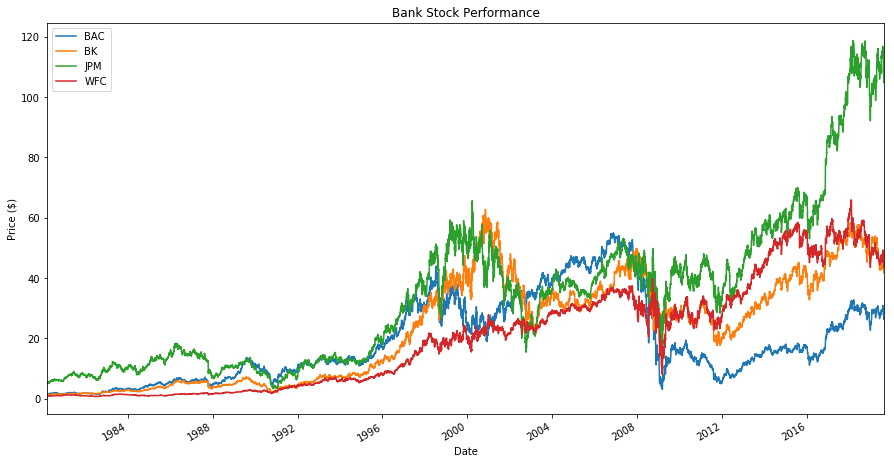

In [193]:
#banks.plot(subplots=True, figsize=(15,8), title='Bank Stock Performance',sharex=True, sharey=True);
banks.plot(figsize=(15,8), title='Bank Stock Performance')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.show();

### Now there's a problem with this chart. All stocks are on different scales, so you won't get the true picture of a stock's performance against other stocks. Moreover, we don't have a benchmark added in here to compare the performance against it. So let us first add a benchmark - S&P500.

In [194]:
sp500 = pd.read_csv('data/SP500.csv', parse_dates=['Date'], index_col='Date')
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17520 entries, 2050-01-03 to 2019-08-19
Data columns (total 1 columns):
SP500    17520 non-null float64
dtypes: float64(1)
memory usage: 273.8 KB


In [195]:
# combine index dataframe with banks dataframe
banks = pd.concat([banks, sp500], axis=1).dropna()
banks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9942 entries, 1980-03-17 to 2019-08-19
Data columns (total 5 columns):
BAC      9942 non-null float64
BK       9942 non-null float64
JPM      9942 non-null float64
WFC      9942 non-null float64
SP500    9942 non-null float64
dtypes: float64(5)
memory usage: 466.0 KB


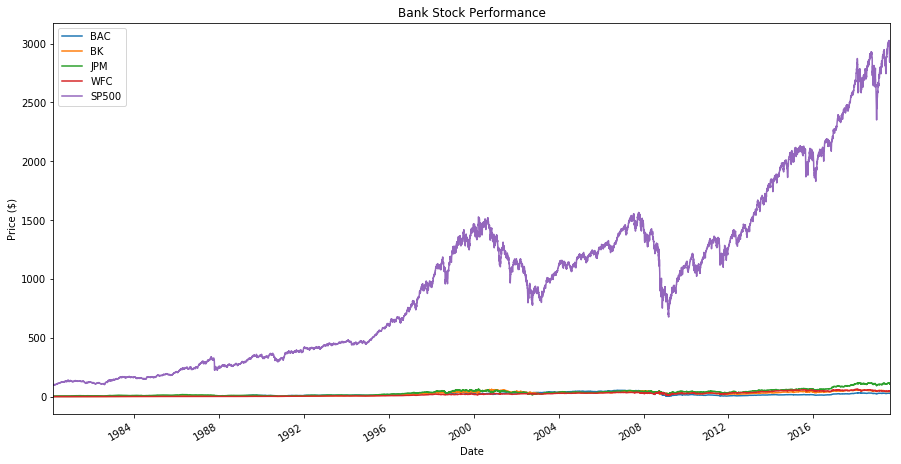

In [196]:
# Now let us plot it again with rest of the stocks.
banks.plot(figsize=(15,8), title='Bank Stock Performance')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.show();

### Now the issue with previous chart is clearly visible. From this chart, anyone with think that all major bank stocks have underperformed over the years and they aren't good investment at all.
### But this is not correct conclusion because we are plotting each of the stock and index data on different scales in same chart which won't give desired result. So, we need to normalize the data before plotting.

# Exercise - 10
### Normalizing different datasets on same scale.

In [197]:
# One way to normalize the data in this case is to use the first value as our reference value and divide all other values by it.

banks.head(1)

,BAC,BK,JPM,WFC,SP500
Date,,,,,
1980-03-17,1.40625,1.341557,5.037037,0.8125,102.260002


In [198]:
# This is the oldest value in the dataframe. We can use each of stock's oldest value to compute it's normalized value as follows:

normalized_banks = banks.div(banks.iloc[0]).mul(100)
normalized_banks.head(5)

,BAC,BK,JPM,WFC,SP500
Date,,,,,
1980-03-17,100.000000,100.000000,100.000000,100.000000,100.000000
1980-03-18,98.888889,99.177001,100.735293,103.205169,101.799331
1980-03-19,102.222222,99.177001,102.205880,100.640985,102.004690
1980-03-20,102.222222,97.119317,101.470587,100.000000,100.840995
1980-03-21,102.222222,96.296318,103.676467,100.000000,100.048891


Before Normalization


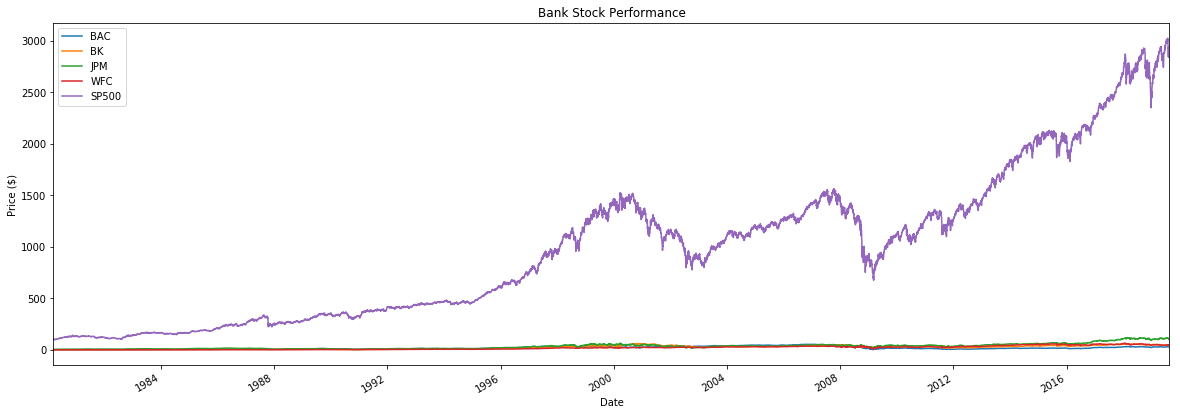

After Normalization


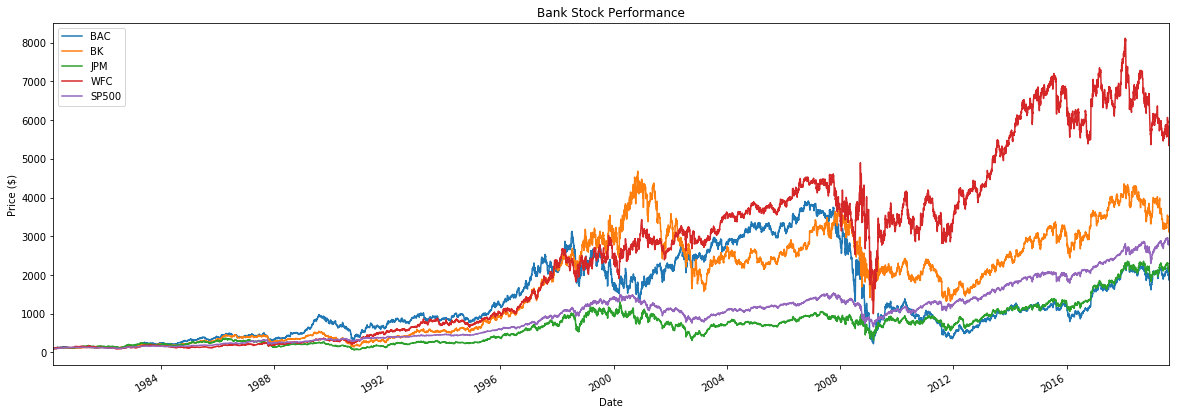

In [199]:
## As we see, all the values are now normalized in the dataframe including that of SP500. Let us plot them now as before

print("Before Normalization")
banks.plot(figsize=(20,7), title='Bank Stock Performance')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.show();


print("After Normalization")
normalized_banks.plot(figsize=(20,7), title='Bank Stock Performance')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.show();

### Now we get completely different results and it shows that WFC and BK banks had been outperforming index for more than 25 years.

In [200]:
# value of $10,000 invested in each of these banks will be equal to 
normalized_banks[-1:].mul(100).applymap("${0:,.2f}".format)

,BAC,BK,JPM,WFC,SP500
Date,,,,,
2019-08-19,"$193,920.00","$318,435.97","$215,781.62","$556,923.08","$285,903.56"
